In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [13]:
df = pd.read_csv('data/data.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21703 entries, 0 to 21702
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             21703 non-null  int64  
 1   year                21703 non-null  int64  
 2   age                 21703 non-null  int64  
 3   suicides_no         21703 non-null  int64  
 4   population          21703 non-null  int64  
 5   gdp_per_capita ($)  21703 non-null  int64  
 6   generation          21703 non-null  int64  
 7   sui_by_pop          21703 non-null  float64
 8   sui_by_total        21703 non-null  float64
 9   gdp_for_year        21703 non-null  int64  
 10  is_male             21703 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.8 MB


In [15]:
df.describe()

,country,year,age,suicides_no,population,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year,is_male
count,21703.000000,21703.000000,21703.000000,21703.000000,2.170300e+04,21703.000000,21703.000000,21703.000000,2.170300e+04,2.170300e+04,21703.000000
mean,45.530894,2000.960374,2.523937,42.241718,6.484881e+05,14642.608626,2.725291,0.000109,3.657710e-05,7.713496e+10,0.473022
std,27.358578,8.428637,1.722491,65.053538,1.268192e+06,17923.304471,1.790422,0.000174,5.632985e-05,1.086982e+11,0.499283
min,0.000000,1985.000000,0.000000,0.000000,2.780000e+02,251.000000,0.000000,0.000000,0.000000e+00,4.691962e+07,0.000000
25%,23.000000,1994.000000,1.000000,1.000000,5.251300e+04,3051.000000,1.000000,0.000005,8.658998e-07,5.329214e+09,0.000000
50%,43.000000,2001.000000,3.000000,11.000000,2.854980e+05,7459.000000,2.000000,0.000046,9.524898e-06,2.396528e+10,0.000000
75%,68.000000,2008.000000,4.000000,55.000000,6.336760e+05,20270.500000,4.000000,0.000140,4.762449e-05,1.040666e+11,1.000000
max,95.000000,2016.000000,5.000000,322.000000,1.827220e+07,126352.000000,5.000000,0.002250,2.788197e-04,4.892852e+11,1.000000


In [16]:
df.sample(5)

,country,year,age,suicides_no,population,gdp_per_capita ($),generation,sui_by_pop,sui_by_total,gdp_for_year,is_male
6134,26,1999,4,71,516749,35763,5,0.000137,0.000061,177965224621,0
8285,34,2010,2,128,1685691,27886,2,0.000076,0.000111,299361576558,1
19401,85,1991,3,2,42788,1235,4,0.000047,0.000002,448300000,0
9758,39,2000,4,3,20653,34372,5,0.000145,0.000003,8927140438,0
15335,64,2008,2,13,577902,3438,0,0.000022,0.000011,18504130753,0


In [17]:
X = df.drop('suicides_no',1)
y = df['suicides_no']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=26)

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [26]:
df_res = pd.DataFrame()
df_res['actual'] = y_test
df_res['pred'] = pred
df_res['MSE'] = mean_squared_error(y_test,pred)
df_res['error'] = y_test - pred


In [27]:
df_res.head()

,actual,pred,MSE,error
19452,1,1.0,2.277851e-22,3.792633e-12
937,6,6.0,2.277851e-22,2.932765e-12
12188,205,205.0,2.277851e-22,6.627943e-11
11026,71,71.0,2.277851e-22,-1.278977e-11
20974,18,18.0,2.277851e-22,3.552714e-15


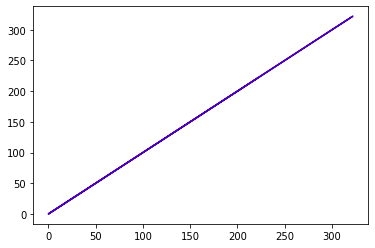

In [28]:
plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)

In [29]:
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'r2: {r2_score(y_test,pred)}')

MSE: 2.277851442855946e-22
SRMSE: 1.509255260999923e-11
MAE: 7.922496810495011e-12
r2: 1.0


In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

********** LinearRegression() **********
MSE: 2.277851442855946e-22
SRMSE: 1.509255260999923e-11
MAE: 7.922496810495011e-12
r2: 1.0
       actual   pred           MSE         error
19452       1    1.0  2.277851e-22  3.792633e-12
937         6    6.0  2.277851e-22  2.932765e-12
12188     205  205.0  2.277851e-22  6.627943e-11
11026      71   71.0  2.277851e-22 -1.278977e-11
20974      18   18.0  2.277851e-22  3.552714e-15
...       ...    ...           ...           ...
7900       18   18.0  2.277851e-22 -1.744382e-12
13625      36   36.0  2.277851e-22  1.129763e-12
16706      65   65.0  2.277851e-22 -1.170974e-11
7368       10   10.0  2.277851e-22  1.572076e-12
5591      221  221.0  2.277851e-22  5.462653e-11

[7162 rows x 4 columns]


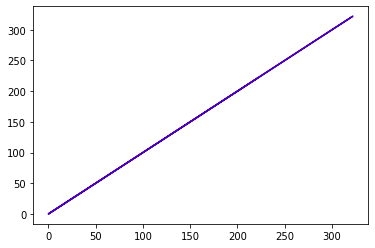

********************
********** Ridge() **********
MSE: 0.01989760030747161
SRMSE: 0.14105885405557358
MAE: 0.08815871516307855
r2: 0.9999952683724876
       actual        pred       MSE     error
19452       1    1.144050  0.019898 -0.144050
937         6    6.086070  0.019898 -0.086070
12188     205  204.903311  0.019898  0.096689
11026      71   71.128619  0.019898 -0.128619
20974      18   18.106627  0.019898 -0.106627
...       ...         ...       ...       ...
7900       18   18.044227  0.019898 -0.044227
13625      36   36.399507  0.019898 -0.399507
16706      65   64.955085  0.019898  0.044915
7368       10   10.060982  0.019898 -0.060982
5591      221  220.758764  0.019898  0.241236

[7162 rows x 4 columns]


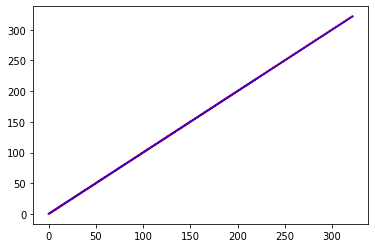

********************
********** Lasso() **********
MSE: 24.19871444985548
SRMSE: 4.919218886150064
MAE: 3.5609567363775096
r2: 0.9942455722656877
       actual        pred        MSE      error
19452       1    4.121746  24.198714  -3.121746
937         6    8.742459  24.198714  -2.742459
12188     205  192.646859  24.198714  12.353141
11026      71   68.811735  24.198714   2.188265
20974      18   19.832172  24.198714  -1.832172
...       ...         ...        ...        ...
7900       18   19.832172  24.198714  -1.832172
13625      36   36.466741  24.198714  -0.466741
16706      65   63.266879  24.198714   1.733121
7368       10   12.439030  24.198714  -2.439030
5591      221  207.433142  24.198714  13.566858

[7162 rows x 4 columns]


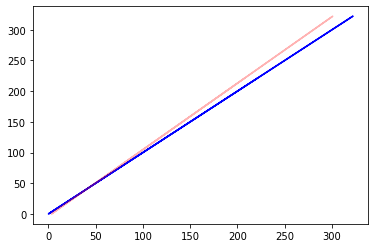

********************
********** AdaBoostRegressor() **********
MSE: 18.53058488096708
SRMSE: 4.304716585440565
MAE: 3.6787664752048315
r2: 0.995593447255513
       actual        pred        MSE     error
19452       1    5.962803  18.530585 -4.962803
937         6    5.962803  18.530585  0.037197
12188     205  203.508197  18.530585  1.491803
11026      71   76.686732  18.530585 -5.686732
20974      18   11.451030  18.530585  6.548970
...       ...         ...        ...       ...
7900       18   11.451030  18.530585  6.548970
13625      36   41.097913  18.530585 -5.097913
16706      65   67.965244  18.530585 -2.965244
7368       10    5.962803  18.530585  4.037197
5591      221  219.826087  18.530585  1.173913

[7162 rows x 4 columns]


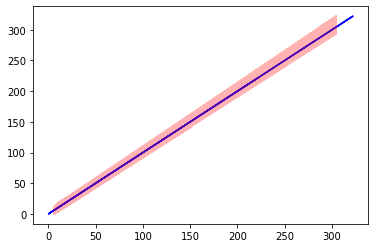

********************
********** DecisionTreeRegressor() **********
MSE: 0.0013962580284836638
SRMSE: 0.0373665362120128
MAE: 0.0013962580284836638
r2: 0.9999996679713734
       actual   pred       MSE  error
19452       1    1.0  0.001396    0.0
937         6    6.0  0.001396    0.0
12188     205  205.0  0.001396    0.0
11026      71   71.0  0.001396    0.0
20974      18   18.0  0.001396    0.0
...       ...    ...       ...    ...
7900       18   18.0  0.001396    0.0
13625      36   36.0  0.001396    0.0
16706      65   65.0  0.001396    0.0
7368       10   10.0  0.001396    0.0
5591      221  221.0  0.001396    0.0

[7162 rows x 4 columns]


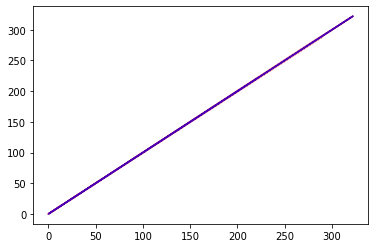

********************
********** RandomForestRegressor() **********
MSE: 0.0006716001117006443
SRMSE: 0.025915248632815475
MAE: 0.003580005585031983
r2: 0.9999998402942306
       actual    pred       MSE  error
19452       1    1.00  0.000672   0.00
937         6    6.00  0.000672   0.00
12188     205  205.00  0.000672   0.00
11026      71   71.00  0.000672   0.00
20974      18   18.00  0.000672   0.00
...       ...     ...       ...    ...
7900       18   18.00  0.000672   0.00
13625      36   36.00  0.000672   0.00
16706      65   65.00  0.000672   0.00
7368       10   10.00  0.000672   0.00
5591      221  221.03  0.000672  -0.03

[7162 rows x 4 columns]


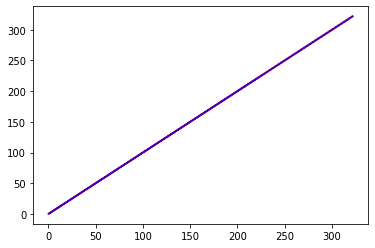

********************


In [32]:
models = [LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('*'*10,model,'*'*10)
    print(f'MSE: {mean_squared_error(y_test,pred)}')
    print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'MAE: {mean_absolute_error(y_test,pred)}')
    print(f'r2: {r2_score(y_test,pred)}')
    
    df_res = pd.DataFrame()
    df_res['actual'] = y_test
    df_res['pred'] = pred
    df_res['MSE'] = mean_squared_error(y_test,pred)
    df_res['error'] = y_test - pred
    print(df_res)
    
    plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
    plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
    plt.show()
    print('*'*20)




********** DecisionTreeRegressor() **********
MSE: 0.0006981290142418319
SRMSE: 0.02642213114496694
MAE: 0.0006981290142418319
r2: 0.9999998339856867


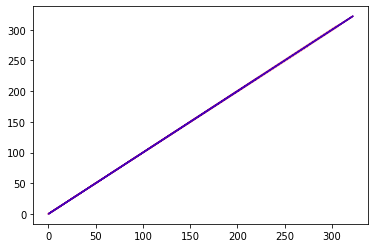

********************


In [35]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('*'*10,model,'*'*10)
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'r2: {r2_score(y_test,pred)}')

df_res = pd.DataFrame()
df_res['actual'] = y_test
df_res['pred'] = pred
df_res['MSE'] = mean_squared_error(y_test,pred)
df_res['error'] = y_test - pred
#print(df_res)

plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
plt.show()
print('*'*20)

In [38]:
df_res.sample(15)

,actual,pred,MSE,error
20540,6,6.0,0.000698,0.0
18022,0,0.0,0.000698,0.0
4058,5,5.0,0.000698,0.0
10930,94,94.0,0.000698,0.0
18701,30,30.0,0.000698,0.0
14744,43,43.0,0.000698,0.0
3310,0,0.0,0.000698,0.0
13526,2,2.0,0.000698,0.0
1025,1,1.0,0.000698,0.0
4013,1,1.0,0.000698,0.0


In [39]:
import pickle

In [41]:
filename = 'models/model.pk'
pickle.dump(model, open(filename, 'wb'))


FileNotFoundError: [Errno 2] No such file or directory: 'models/model.pk'